In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import networkx as nx
import sys
import random
sys.path.append('../src/')
from random_graph import RandGraph
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from random import choice

## Defaut graph

Specify a named graph for reproducible execution of runs.

In [3]:
entry_nodes = [1]
core_nodes = [2,3,4]
exit_nodes = [5]

In [4]:
edges = [
    (1,2),
    (2,3),
    (3,4),
    (4,2),
    (4,5)
]

In [5]:
g = nx.DiGraph()
g.add_edges_from(edges)

In [12]:
g = RandGraph(graph_type='simple', actors=1000, moving=10)

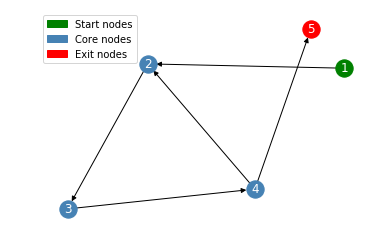

In [14]:
g.plot()

## Hongo district

In [16]:
entry_nodes = list(range(1,11))
exit_nodes = list(range(11,24))

In [21]:
# core node capacity
capa = pd.read_csv('../data/core_node_capacity.csv')

In [25]:
core_nodes = [(x[0], {'capacity': x[1]}) for x in capa.itertuples()]

In [26]:
g = nx.DiGraph()

In [27]:
g.add_nodes_from(entry_nodes)
g.add_nodes_from(exit_nodes)
g.add_nodes_from(core_nodes)

In [28]:
nx.set_node_attributes(g, None, 'actors')

### add edges

In [38]:
# entry edges
entry_edges = pd.read_csv('../data/entry_edges_Hongo_district.csv', header=None)

In [39]:
entry_edges_tpl = [(x[0],x[1]) for x in entry_edges.itertuples()]

In [40]:
# exit edges
exit_edges = pd.read_csv('../data/exit_edges_Hongo_district.csv', header=None)

In [42]:
exit_edges_tpl = [(x[0],x[1]) for x in exit_edges.itertuples()]

In [43]:
# core nodes edges
core_edges = pd.read_csv('../data/core_edge_list_Hongo_district.csv')

In [44]:
core_edges.head()

,head_node,tail_node_1,tail_node_2,tail_node_3,tail_node_4,tail_node_5,tail_node_6
0,24,25,30,NaN,NaN,NaN,NaN
1,25,24,26,NaN,NaN,NaN,NaN
2,26,25,27,28.0,NaN,NaN,NaN
3,27,26,28,NaN,NaN,NaN,NaN
4,28,26,27,29.0,31.0,NaN,NaN


In [55]:
edg_lst = []
for col in core_edges.head():
    if col != 'head_node':
        head_val = core_edges['head_node'].head().values
        tail_val = core_edges[col].head().values
        edg_lst.append([(x, y) for x,y in zip(head_val, tail_val)])

In [56]:
edg_lst

[[(24, 25), (25, 24), (26, 25), (27, 26), (28, 26)],
 [(24, 30), (25, 26), (26, 27), (27, 28), (28, 27)],
 [(24, nan), (25, nan), (26, 28.0), (27, nan), (28, 29.0)],
 [(24, nan), (25, nan), (26, nan), (27, nan), (28, 31.0)],
 [(24, nan), (25, nan), (26, nan), (27, nan), (28, nan)],
 [(24, nan), (25, nan), (26, nan), (27, nan), (28, nan)]]